# Problem statement

Optimize Reinforcement Learning algorithms to minimize both the distance to a target location and the time taken to reach it by incorporating Temporal Difference learning in the update functions.








In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

This code defines a grid-based environment where the agent starts at the bottom-left corner and aims to reach the top-right corner, with the goal position predefined. It also implements step functionality to update the agent’s position based on the chosen action, while calculating the reward based on distance and a time penalty.

In [16]:
class Environment:
    def __init__(self, grid_size=10):
        self.grid_size = grid_size
        self.goal_position = np.array([grid_size - 1, grid_size - 1])
        self.state = np.array([0, 0])
        self.max_steps = 100

    def reset(self):
        self.state = np.array([0, 0])
        return self.state

    def step(self, action):
        if action == 0:  # Move up
            self.state[1] = min(self.state[1] + 1, self.grid_size - 1)
        elif action == 1:  # Move down
            self.state[1] = max(self.state[1] - 1, 0)
        elif action == 2:  # Move right
            self.state[0] = min(self.state[0] + 1, self.grid_size - 1)
        elif action == 3:  # Move left
            self.state[0] = max(self.state[0] - 1, 0)

        distance = np.linalg.norm(self.goal_position - self.state)
        time_penalty = -1
        done = np.array_equal(self.state, self.goal_position)
        reward = -distance + time_penalty
        return self.state, reward, done

Implements the Q-learning algorithm, which includes initializing Q-values, selecting actions using an epsilon-greedy strategy, and updating Q-values using the Bellman equation. The agent learns to navigate towards the goal efficiently.

In [17]:
class QLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = {}

    def get_q_value(self, state, action):
        return self.q_table.get((tuple(state), action), 0.0)

    def update_q_value(self, state, action, next_state, reward):
        max_q_next = max(self.get_q_value(next_state, a) for a in range(4))
        current_q = self.get_q_value(state, action)
        new_q = current_q + self.alpha * (reward + self.gamma * max_q_next - current_q)
        self.q_table[(tuple(state), action)] = new_q

    def select_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, 3)
        else:
            return np.argmax([self.get_q_value(state, a) for a in range(4)])

    def train(self, episodes=100):
        self.steps_per_episode = []
        for episode in range(episodes):
            state = self.env.reset()
            done = False
            steps = 0
            
            while not done and steps < self.env.max_steps:
                action = self.select_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, next_state, reward)
                state = next_state
                steps += 1
            
            self.steps_per_episode.append(steps)

Plots the number of steps taken in each episode during training, providing insight into the agent's learning process.

In [18]:
def visualize_training(agent):
    plt.plot(agent.steps_per_episode)
    plt.title('Steps per Episode during Training')
    plt.xlabel('Episode')
    plt.ylabel('Steps Taken')
    plt.grid()
    plt.show()

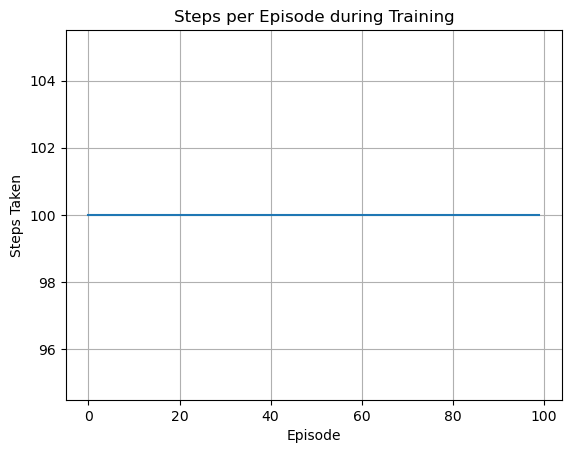

In [19]:
env = Environment()
agent = QLearningAgent(env)
agent.train(episodes=100)
visualize_training(agent)

It creates instances of the environment and agent, trains the agent, visualizes the training process, tests the trained agent to reach the goal, and visualizes the trajectory taken by the agent.

In [20]:
state = env.reset()
done = False
steps = 0
trajectory = [tuple(state)]

while not done:
    action = agent.select_action(state)
    state, reward, done = env.step(action)
    trajectory.append(tuple(state))
    steps += 1

print("Reached goal in", steps, "steps!")

Reached goal in 10395 steps!


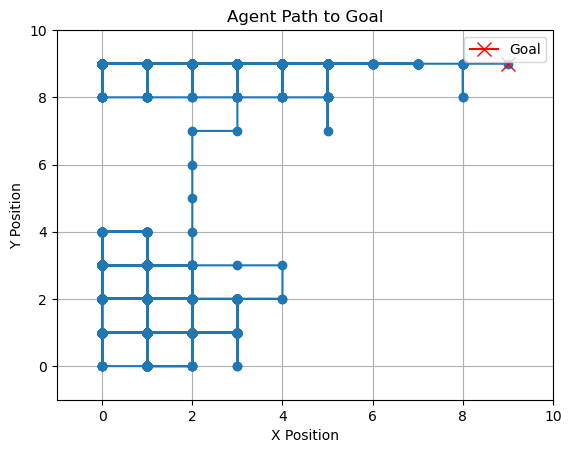

In [21]:
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o')
plt.plot(env.goal_position[0], env.goal_position[1], marker='x', markersize=10, color='red', label='Goal')
plt.title('Agent Path to Goal')
plt.xlim(-1, env.grid_size)
plt.ylim(-1, env.grid_size)
plt.grid()
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.show()